In [1]:
import pandas as pd
import pickle

#  read csv
df = pd.read_csv("C:/Users/drrr8/OneDrive - Washington University in St. Louis/Desktop/tripadvisor_hotel_reviews.csv")
df['p1']=df['Rating'].apply(lambda x: 'positive' if x>2 else 'negative')
# convert csv to pkl
df.to_pickle('trip.pkl')
df = pd.read_pickle('trip.pkl')

In [2]:
from sklearn.model_selection import train_test_split

# split the dataset into two

# training and test dataset
train_data, test_data = train_test_split(df, test_size=0.3, random_state=2)

with open('train.pkl', 'wb') as f:
    pickle.dump(train_data, f)
    
with open('test.pkl', 'wb') as f:
    pickle.dump(test_data, f)

In [3]:
print("Dimensions for test data:", test_data.shape)
print("Dimensions for training data:", train_data.shape,"\n")
print("First 5 rows in test dataset: \n", test_data.head(),"\n")
print("First 5 rows in  training dataset: \n", train_data.head())

Dimensions for test data: (6148, 3)
Dimensions for training data: (14343, 3) 

First 5 rows in test dataset: 
                                                   Review  Rating        p1
10271  not family friendly hotel, travelled wife 2 yr...       1  negative
7142   did n't know expect honemoon surprise loved, r...       4  positive
18500  enthusiastically reccomend majestic colonial, ...       5  positive
17145  problems start beware hotel, choices resort pu...       1  negative
2704   enjoyed second stay husband just returned seco...       5  positive 

First 5 rows in  training dataset: 
                                                   Review  Rating        p1
5098   nice hotel good service stayed quite hotel par...       4  positive
7162   notch resort wife honeymoon secrets 10/6-10/14...       4  positive
17228  baihia principe resort friend just returned pu...       4  positive
1691   good not good stayed university tower hotel 3 ...       3  positive
6805   excellent husband 

In [4]:
pip install pyLDAvis sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
#packages needed

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np 

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

#text normalization function
%run "C:/Users/drrr8/OneDrive - Washington University in St. Louis/Desktop/562 text mining/Text_Normalization_Function.ipynb"

#ignore warnings about future changes in functions as they take too much space
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [6]:
test_reviews = np.array(test_data['Review'])
test_rate = np.array(test_data['Rating'])
test_p1 = np.array(test_data['p1'])

train_reviews = np.array(train_data['Review'])
train_rate = np.array(train_data['Rating'])
train_p1 = np.array(train_data['p1'])

In [7]:
normalized_test_reviews = normalize_corpus(test_reviews)
normalized_train_reviews = normalize_corpus(train_reviews)

In [8]:
#VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [10]:
#just observe examples
text_1 = 'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,'
text_2 = 'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle'

In [11]:
print(text_1, "\nScores:", analyzer.polarity_scores(text_1),"\n")
print(text_2, "\nScores:", analyzer.polarity_scores(text_2),"\n")

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night, 
Scores: {'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747} 

ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free brea

In [12]:
sample_docs = [100, 700] #indecies for 2 sample documnets 

for doc_index in sample_docs:
    print('Review:-')
    print(test_reviews[doc_index])
    print('Actual Rate:', test_rate[doc_index])
    print('Actual Polarity:', test_p1[doc_index])
    print()

Review:-
fantastic stayed excellence punta cana february vacation realize days n't, resort fantastic, clean staff friendly drinks plentiful, highly recommend coco loco served coconut, overall food good consider picky eater, lobster place favorite, spent time sitting pool ocean bit rough taste lounging inside raining, did n't advantage horseback riding bike tour heard fun, recommend leaving property going plaza time, shops fun souvenirs haggle vendors lot fun, downside leaving property taxi cost 35 way, better idea country like taxi ride though.my complaint n't night life, michael jackson best, disco fun especially staff hand dancing dance lessons afternoons, went vacation friend arrived obvious resort catered mainly couples not advertized website, hard time getting room beds nicolas extremely helpful situation, emilio concierge friendly informative entertainment crew isael best,  
Actual Rate: 4
Actual Polarity: positive

Review:-
loved, ca n't wait come, wonderful stay, super friendly

In [13]:
#function that scores text using VADER lexicon and prints the actual and scored sentiment
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)  
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:                             
        print('VADER Polarity (Binary):', binary_sentiment)
        print('VADER Score:', round(scores['compound'], 2))
    return binary_sentiment,scores['compound'] 

In [14]:
for doc_index in sample_docs:
    print('\nReview text:\n')
    print(test_reviews[doc_index],"\n")
    print('ACTUAL Rate :', test_rate[doc_index],"\n")   
    print('ACTUAL Polarity :', test_p1[doc_index],"\n")
    final_sentiment = analyze_sentiment_vader_lexicon(normalized_test_reviews[doc_index],
                                                        threshold=0.1,
                                                        verbose=True)
    print('-'*60) 


Review text:

fantastic stayed excellence punta cana february vacation realize days n't, resort fantastic, clean staff friendly drinks plentiful, highly recommend coco loco served coconut, overall food good consider picky eater, lobster place favorite, spent time sitting pool ocean bit rough taste lounging inside raining, did n't advantage horseback riding bike tour heard fun, recommend leaving property going plaza time, shops fun souvenirs haggle vendors lot fun, downside leaving property taxi cost 35 way, better idea country like taxi ride though.my complaint n't night life, michael jackson best, disco fun especially staff hand dancing dance lessons afternoons, went vacation friend arrived obvious resort catered mainly couples not advertized website, hard time getting room beds nicolas extremely helpful situation, emilio concierge friendly informative entertainment crew isael best,   

ACTUAL Rate : 4 

ACTUAL Polarity : positive 

VADER Polarity (Binary): positive
VADER Score: 1.0


In [15]:
#score all hotel reviews in the test dataset:
VADER_polarity_test = [analyze_sentiment_vader_lexicon(review, threshold=0.1) for review in test_reviews]
VADER_polarity_test_df = pd.DataFrame(VADER_polarity_test, columns = ['VADER Polarity','VADER Score'])
VADER_polarity_test_df.head()

,VADER Polarity,VADER Score
0,negative,-0.9481
1,positive,0.9891
2,positive,0.9690
3,negative,-0.8286
4,positive,0.9943


In [16]:
polarity_count = VADER_polarity_test_df['VADER Polarity'].value_counts()
polarity_count_df = pd.DataFrame(polarity_count).rename(columns={'VADER Polarity': 'Count'})
total_count = len(VADER_polarity_test_df)
polarity_count_df.loc['Total'] = total_count
polarity_count_df

,count
VADER Polarity,
positive,5631
negative,517
Total,6148


In [17]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(test_p1, 
                                 VADER_polarity_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.895 



In [18]:
pd.crosstab(pd.Series(test_p1), 
            pd.Series(VADER_polarity_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,425,552,977
positive,92,5079,5171
All,517,5631,6148


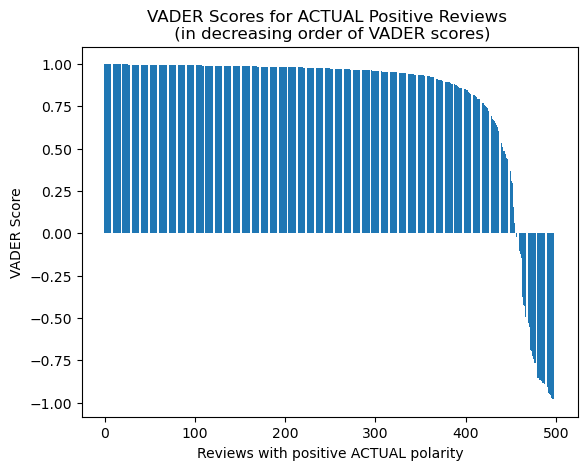

In [19]:
import matplotlib.pyplot as plt

pos_reviews_scored = VADER_polarity_test_df[:500]['VADER Score']
plt.bar(range(0, 500), pos_reviews_scored.sort_values(ascending=False))
plt.xlabel("Reviews with positive ACTUAL polarity")
plt.ylabel("VADER Score")
plt.title("VADER Scores for ACTUAL Positive Reviews \n (in decreasing order of VADER scores)")
plt.show()

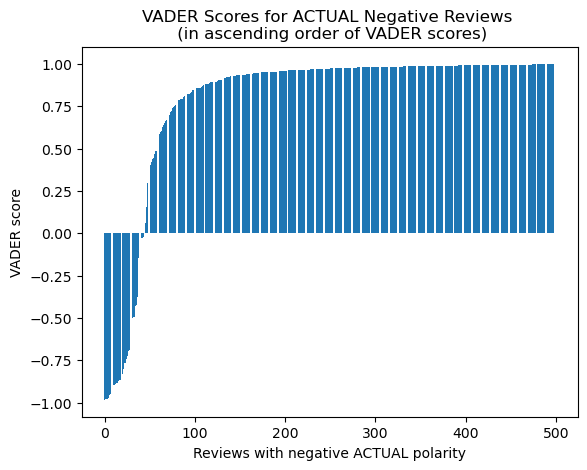

In [20]:
neg_reviews_scored = VADER_polarity_test_df[0:500]['VADER Score']
plt.bar(range(0, 500), neg_reviews_scored.sort_values(ascending=True))
plt.xlabel("Reviews with negative ACTUAL polarity")
plt.ylabel("VADER score")
plt.title("VADER Scores for ACTUAL Negative Reviews \n (in ascending order of VADER scores)")
plt.show()

In [21]:
# divide into positive and negative
positive_corpus = test_reviews[VADER_polarity_test_df['VADER Polarity'] == 'positive'].tolist()
negative_corpus = test_reviews[VADER_polarity_test_df['VADER Polarity'] == 'negative'].tolist()

In [22]:
#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.lda_model

import matplotlib.pyplot as plt
%matplotlib inline

#define text normalization function
%run "C:/Users/drrr8/OneDrive - Washington University in St. Louis/Desktop/562 text mining/Text_Normalization_Function.ipynb"
#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

ERROR: Invalid requirement: '#visualizing'


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\drrr8\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [24]:
!{sys.executable} -m pip install gensim
import gensim

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [25]:
#define the bag-of-words vectorizer:
bow_vectorizer = CountVectorizer()

In [26]:
# do LDA for positive
# vectorize the normalized data:
bow_positive_corpus = bow_vectorizer.fit_transform(positive_corpus)

In [27]:
# positive corpus, assume that there are 5 topics
lda_positive_corpus = LatentDirichletAllocation(n_components=5, max_iter=500,
                                                doc_topic_prior = 0.5,
                                                topic_word_prior = 0.25).fit(bow_positive_corpus)

In [28]:
no_top_words = 15
display_topics(lda_positive_corpus, bow_vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
not beach resort did food great good pool room just time day no people like
Topic 1:
bali waikiki villa ubud rs villas kuta dua nusa private it__ç_é_ hawaii spa balinese rice
Topic 2:
hotel room not stay good great nice did rooms night no location staff stayed breakfast
Topic 3:
hotel great staff location stay breakfast stayed helpful clean friendly good rooms excellent room walk
Topic 4:
york nyc new hong kong ny harbour manhattan hk times affinia mandarin oriental state subway


In [29]:
word_weights = lda_positive_corpus.components_ / lda_positive_corpus.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_vectorizer.get_feature_names_out(), 
                               columns = ["Topic_" + str(i) for i in range(5)])
word_weights_df.head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
00,0.000841,0.000017,7.191875e-04,0.000002,0.000019
000,0.000047,0.000792,4.594852e-05,0.000002,0.000019
0001,0.000001,0.000016,4.777650e-06,0.000002,0.000019
000rp,0.000001,0.000206,9.679526e-07,0.000002,0.000018
000rupiah,0.000001,0.000079,9.602259e-07,0.000002,0.000018
000us,0.000001,0.000016,9.587769e-07,0.000011,0.000019
00a,0.000001,0.000268,1.016267e-06,0.000002,0.000019
00am,0.000067,0.000016,6.754091e-05,0.000002,0.000019
00dollars,0.000001,0.000016,9.583477e-07,0.000002,0.000092
00gbp,0.000001,0.000016,4.786015e-06,0.000002,0.000019


In [30]:
word_weights_df.sort_values(by='Topic_0',ascending=False).head(10)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4
not,0.016776,0.000016,1.567095e-02,0.003216,0.000019
beach,0.013121,0.000017,9.940111e-07,0.000002,0.000019
resort,0.010163,0.000017,9.712997e-07,0.000002,0.000019
did,0.009501,0.000016,6.655918e-03,0.000002,0.000019
food,0.009180,0.000017,1.411611e-03,0.001347,0.000019
great,0.008235,0.000017,7.164681e-03,0.022429,0.000019
good,0.008171,0.000017,7.919155e-03,0.009338,0.000019
pool,0.007974,0.000017,1.694461e-03,0.000002,0.000019
room,0.007361,0.000016,2.568701e-02,0.008493,0.000019
just,0.007114,0.000017,4.534078e-03,0.006679,0.000019


In [31]:
# Topic Model Visualization
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.lda_model.prepare(lda_positive_corpus, bow_positive_corpus, bow_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      181.001282 -136.044388       1        1  42.724305
0      115.147934 -273.949707       2        1  36.438558
3       85.963814  -23.304464       3        1  17.325627
1      -63.121109  -58.419235       4        1   1.944869
4      -11.618972 -197.294067       5        1   1.566641, topic_info=           Term          Freq         Total Category  logprob  loglift
12269     hotel  12860.000000  12860.000000  Default  30.0000  30.0000
3193      beach   2804.000000   2804.000000  Default  29.0000  29.0000
14564  location   2980.000000   2980.000000  Default  28.0000  28.0000
11271     great   5833.000000   5833.000000  Default  27.0000  27.0000
22945     staff   4411.000000   4411.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
13268    island     25.875845    280.549193   Topic5  -5.8722   1.7728
24608     times     34.671807    728.394901   Topic5  -5.5795   1.1113
828         5th     18.766622    101.981104   Topic5  -6.1934   2.4635
22907    square     24.053410    425.732949   Topic5  -5.9452   1.2827
17770      park     18.673457    367.394417   Topic5  -6.1984   1.1769

[341 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
703        5  0.909424        42nd
828        1  0.647179         5th
828        2  0.166698         5th
828        5  0.186309         5th
1286       2  0.997436  activities
...      ...       ...         ...
27026      3  0.512794   wonderful
27264      1  0.386070         yes
27264      2  0.557002         yes
27264      4  0.053048         yes
27300      5  0.991942        york

[488 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2, 5])

In [32]:
#tokenizing the corpus
news_corpus_tokenized = [tokenize_text(positive_corpus[doc_id]) for doc_id in range(len(positive_corpus))]

#Dictionary of the corpus:
news_dictionary = Dictionary(news_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
news_corpus_bow = [news_dictionary.doc2bow(doc) for doc in news_corpus_tokenized]

In [33]:
#top 15 words for each topic (using the function defined in session prep)
topic_topwords_5_positive = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_positive_corpus, n_words=15)
cm_5 = CoherenceModel(topics=topic_topwords_5_positive, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm_5.get_coherence(), 4))  # get coherence value

Coherence score for the model:  -3.6363


In [34]:
print("Log-Likelihood (higher values are better): ", lda_positive_corpus.score(bow_positive_corpus))

Log-Likelihood (higher values are better):  -4556583.7995051835


In [35]:
print("Perplexity (lower values are better): ", lda_positive_corpus.perplexity(bow_positive_corpus))

Perplexity (lower values are better):  2370.478293844522


In [36]:
# positive corpus, assume that there are 4 topics
lda_positive_corpus4 = LatentDirichletAllocation(n_components=4, max_iter=500,
                                                doc_topic_prior = 0.5,
                                                topic_word_prior = 0.25).fit(bow_positive_corpus)

no_top_words = 15
display_topics(lda_positive_corpus4, bow_vectorizer.get_feature_names_out(), no_top_words)

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.lda_model.prepare(lda_positive_corpus4, bow_positive_corpus, bow_vectorizer, mds='tsne')

Topic 0:
not beach resort did food room great good pool just time no day people like
Topic 1:
paris orleans french quarter kong hong st eiffel new bourbon hk pacific arc mtr charles
Topic 2:
bali ubud villa kuta dua nusa balinese villas rice alila seminyak sanur uma sunset legian
Topic 3:
hotel room great not stay staff location good rooms breakfast stayed nice clean just night


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      218.727921 -316.431305       1        1  57.482395
0       87.083046 -285.040131       2        1  39.270288
1      118.573288 -153.060455       3        1   1.975357
2      250.189529 -184.474152       4        1   1.271960, topic_info=           Term          Freq         Total Category  logprob  loglift
12269     hotel  13128.000000  13128.000000  Default  30.0000  30.0000
3193      beach   2816.000000   2816.000000  Default  29.0000  29.0000
20327    resort   2181.000000   2181.000000  Default  28.0000  28.0000
14564  location   3051.000000   3051.000000  Default  27.0000  27.0000
16531       new    988.000000    988.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
23615    sunset     12.591427     33.099528   Topic4  -6.3841   3.3981
9816     fields      7.095490      9.830111   Topic4  -6.9576   4.0386
20561      rice     14.901851     50.426876   Topic4  -6.2156   3.1456
23258     storm     10.438854     39.159911   Topic4  -6.5716   3.0425
13934        ku      7.221634     14.580483   Topic4  -6.9400   3.6620

[249 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
774        2  0.155718        50th
774        4  0.856450        50th
1286       2  0.997463  activities
1304       3  0.956670      adagio
1698       4  0.967448       alila
...      ...       ...         ...
26541      1  0.257851       water
26541      2  0.741415       water
26643      1  0.998818     weekend
26692      1  0.258472        went
26692      2  0.740844        went

[294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3])

In [37]:
#top 15 words for each topic (using the function defined in session prep)
topic_topwords_4_positive = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_positive_corpus4, n_words=15)
cm_4 = CoherenceModel(topics=topic_topwords_4_positive, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm_4.get_coherence(), 4))  # get coherence value
print("Log-Likelihood (higher values are better): ", lda_positive_corpus4.score(bow_positive_corpus))
print("Perplexity (lower values are better): ", lda_positive_corpus4.perplexity(bow_positive_corpus))

Coherence score for the model:  -4.7512
Log-Likelihood (higher values are better):  -4547989.173181516
Perplexity (lower values are better):  2335.9867161081306


In [38]:
# positive corpus, assume that there are 3 topics
lda_positive_corpus3 = LatentDirichletAllocation(n_components=3, max_iter=500,
                                                doc_topic_prior = 0.5,
                                                topic_word_prior = 0.25).fit(bow_positive_corpus)

no_top_words = 15
display_topics(lda_positive_corpus3, bow_vectorizer.get_feature_names_out(), no_top_words)

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.lda_model.prepare(lda_positive_corpus3, bow_positive_corpus, bow_vectorizer, mds='tsne')

Topic 0:
not beach resort food did great good pool room just time day people no nice
Topic 1:
hotel room great staff location stay good not breakfast rooms stayed nice clean just friendly
Topic 2:
not room hotel no did night stay desk service told like check rooms asked time


PreparedData(topic_coordinates=                 x            y  topics  cluster       Freq
topic                                                      
1      -260.889709   681.611206       1        1  48.758009
0     -1114.536133 -1369.353882       2        1  37.531184
2      1093.192017 -1087.311890       3        1  13.710807, topic_info=             Term          Freq         Total Category  logprob  loglift
12269       hotel  13128.000000  13128.000000  Default  30.0000  30.0000
16757         not   7850.000000   7850.000000  Default  29.0000  29.0000
3193        beach   2822.000000   2822.000000  Default  28.0000  28.0000
20790        room   8921.000000   8921.000000  Default  27.0000  27.0000
14564    location   3059.000000   3059.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
9356   experience    200.195805    875.979331   Topic3  -5.9954   0.5109
11130         got    216.818394   1576.760015   Topic3  -5.9157   0.0029
22945       staff    241.527960   4507.525222   Topic3  -5.8077  -0.9395
7040          day    220.134681   2564.818220   Topic3  -5.9005  -0.4684
2265         area    208.173482   1630.613467   Topic3  -5.9563  -0.0714

[252 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
0          1  0.086705          00
0          2  0.433527          00
0          3  0.478278          00
1286       2  0.999460  activities
1698       3  0.984538       alila
...      ...       ...         ...
26692      1  0.176453        went
26692      2  0.702512        went
26692      3  0.121208        went
26930      2  0.090726        wing
26930      3  0.907263        wing

[350 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [39]:
#top 15 words for each topic (using the function defined in session prep)
topic_topwords_3_positive = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_positive_corpus3, n_words=15)
cm_3 = CoherenceModel(topics=topic_topwords_3_positive, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm_3.get_coherence(), 4))  # get coherence value
print("Log-Likelihood (higher values are better): ", lda_positive_corpus3.score(bow_positive_corpus))
print("Perplexity (lower values are better): ", lda_positive_corpus3.perplexity(bow_positive_corpus))

Coherence score for the model:  -0.9885
Log-Likelihood (higher values are better):  -4535580.565015859
Perplexity (lower values are better):  2287.0724749665446


In [40]:
# do LDA for negative
# vectorize the normalized data:
bow_negative_corpus = bow_vectorizer.fit_transform(negative_corpus)

In [41]:
#tokenizing the corpus
news_corpus_tokenized = [tokenize_text(negative_corpus[doc_id]) for doc_id in range(len(negative_corpus))]

#Dictionary of the corpus:
news_dictionary = Dictionary(news_corpus_tokenized)

#Bag-of-words representation for each document of the corpus:
news_corpus_bow = [news_dictionary.doc2bow(doc) for doc in news_corpus_tokenized]

In [42]:
# negative corpus, assume that there are 5 topics
lda_negative_corpus5 = LatentDirichletAllocation(n_components=5, max_iter=500,
                                                doc_topic_prior = 0.5,
                                                topic_word_prior = 0.25).fit(bow_negative_corpus)

no_top_words = 15
display_topics(lda_negative_corpus5, bow_vectorizer.get_feature_names_out(), no_top_words)

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.lda_model.prepare(lda_negative_corpus5, bow_negative_corpus, bow_vectorizer, mds='tsne')

Topic 0:
hospital riu conditions mold bathroom poor standard bleach scary saw quality metal bambu medical naiboa
Topic 1:
star buffet tour ramada says shop information items cab ca contact driver tell does home
Topic 2:
sofa ibis over course sat baggage toddler deceptive bartender 08 don__ but linens wake picked
Topic 3:
not no room food resort hotel beach did people day like got just water time
Topic 4:
hotel room not no stay did staff rooms night service stayed breakfast just desk told


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
4      10.017976 -131.296509       1        1  61.895139
3      76.821739  -57.498455       2        1  29.212338
1     -19.548721   39.252228       3        1   5.014387
0     -56.197414  -52.731270       4        1   2.252869
2      83.117203   41.620144       5        1   1.625268, topic_info=         Term         Freq        Total Category  logprob  loglift
5500   resort   115.000000   115.000000  Default  30.0000  30.0000
809     beach   113.000000   113.000000  Default  29.0000  29.0000
3326    hotel  1111.000000  1111.000000  Default  28.0000  28.0000
4492      not  1130.000000  1130.000000  Default  27.0000  27.0000
2781     food   167.000000   167.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
7187   wakeup     0.735124     2.320697   Topic5  -6.9619   2.9699
204        80     0.749607     6.234477   Topic5  -6.9424   2.0012
6622     that     0.726886     2.886095   Topic5  -6.9732   2.7406
273   account     0.726020     5.150913   Topic5  -6.9744   2.1601
7367    women     0.723827     5.774794   Topic5  -6.9774   2.0428

[328 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
6         4  0.504779      04
8         3  0.393020      06
8         4  0.393020      06
11        4  0.340810      08
11        5  0.340810      08
...     ...       ...     ...
7331      1  0.982523  window
7367      2  0.692665   women
7367      5  0.173166   women
7384      4  0.636766  worker
7394      3  0.637415   worry

[435 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

In [43]:
#top 15 words for each topic (using the function defined in session prep)
topic_topwords_5_negative = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_negative_corpus5, n_words=15)
cm_5n = CoherenceModel(topics=topic_topwords_5_negative, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm_5n.get_coherence(), 4))  # get coherence value
print("Log-Likelihood (higher values are better): ", lda_negative_corpus5.score(bow_negative_corpus))
print("Perplexity (lower values are better): ", lda_negative_corpus5.perplexity(bow_negative_corpus))

Coherence score for the model:  -8.9057
Log-Likelihood (higher values are better):  -371655.85456938477
Perplexity (lower values are better):  2401.129908385915


In [44]:
# negative corpus, assume that there are 4 topics
lda_negative_corpus4 = LatentDirichletAllocation(n_components=4, max_iter=500,
                                                doc_topic_prior = 0.5,
                                                topic_word_prior = 0.25).fit(bow_negative_corpus)

no_top_words = 15
display_topics(lda_negative_corpus4, bow_vectorizer.get_feature_names_out(), no_top_words)

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.lda_model.prepare(lda_negative_corpus4, bow_negative_corpus, bow_vectorizer, mds='tsne')

Topic 0:
beach resort food week princess riu bar doctor happy hospital english everyday cleaned steps sick
Topic 1:
items 11 home cards theft stolen safe insurance happened letter phone knee california hospital hand
Topic 2:
not hotel room no did stay staff rooms service night just day stayed good time
Topic 3:
sick star it maintenance furniture mildew fee apple la marco chipped shuttle standard quality 2nd


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      -30.076370 -331.799347       1        1  87.945562
0       31.231564 -442.054321       2        1   6.483145
3     -139.704315 -393.938995       3        1   2.930698
1      -78.432625 -503.817291       4        1   2.640595, topic_info=          Term         Freq        Total Category  logprob  loglift
809      beach   113.000000   113.000000  Default  30.0000  30.0000
6264      star    91.000000    91.000000  Default  29.0000  29.0000
5500    resort   116.000000   116.000000  Default  28.0000  28.0000
4492       not  1170.000000  1170.000000  Default  27.0000  27.0000
3326     hotel  1142.000000  1142.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
341     advice     1.880605    10.804845   Topic4  -6.5079   1.8858
4308    months     1.922971    16.420311   Topic4  -6.4857   1.4895
5806  security     1.708808    17.610572   Topic4  -6.6037   1.3015
4514    number     1.473815    11.284742   Topic4  -6.7517   1.5986
6580   telling     1.458351    11.297805   Topic4  -6.7622   1.5869

[232 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
24        2  0.856008   10pm
25        1  0.816615     11
25        4  0.192145     11
40        2  0.884806     13
80        1  0.553042   2005
...     ...       ...    ...
7394      1  0.342247  worry
7394      4  0.342247  worry
7404      3  0.499803    wow
7427      2  0.693200   yeah
7427      3  0.231067   yeah

[288 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [45]:
#top 15 words for each topic (using the function defined in session prep)
topic_topwords_4_negative = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_negative_corpus4, n_words=15)
cm_4n = CoherenceModel(topics=topic_topwords_4_negative, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm_4n.get_coherence(), 4))  # get coherence value
print("Log-Likelihood (higher values are better): ", lda_negative_corpus4.score(bow_negative_corpus))
print("Perplexity (lower values are better): ", lda_negative_corpus4.perplexity(bow_negative_corpus))

Coherence score for the model:  -6.8287
Log-Likelihood (higher values are better):  -370828.5799350186
Perplexity (lower values are better):  2359.886613609556


In [46]:
# negative corpus, assume that there are 3 topics
lda_negative_corpus3 = LatentDirichletAllocation(n_components=3, max_iter=500,
                                                doc_topic_prior = 0.5,
                                                topic_word_prior = 0.25).fit(bow_negative_corpus)

no_top_words = 15
display_topics(lda_negative_corpus3, bow_vectorizer.get_feature_names_out(), no_top_words)

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.lda_model.prepare(lda_negative_corpus3, bow_negative_corpus, bow_vectorizer, mds='tsne')

Topic 0:
hotel not room stay no rooms stayed night staff did location just small breakfast service
Topic 1:
juan conference dark street cool san shuttle overlooked pool true elevator make sleepless makes order
Topic 2:
not room hotel no did service food staff day night told resort just got went


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
2     -36.029900 -442.021973       1        1  52.115465
0      87.619164 -425.532440       2        1  43.378397
1      11.302910 -326.396118       3        1   4.506138, topic_info=            Term         Freq        Total Category  logprob  loglift
3326       hotel  1109.000000  1109.000000  Default  30.0000  30.0000
3916    location   109.000000   109.000000  Default  29.0000  29.0000
5500      resort   122.000000   122.000000  Default  28.0000  28.0000
809        beach   119.000000   119.000000  Default  27.0000  27.0000
2781        food   173.000000   173.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
4699  overpriced     2.860289    17.252749   Topic3  -6.6230   1.3027
7242       water     3.018048   112.428302   Topic3  -6.5694  -0.5180
3333     hotwire     2.596920    12.766160   Topic3  -6.7196   1.5073
5074    pressure     2.528758     9.163797   Topic3  -6.7462   1.8122
3163        hard     2.654369    33.145232   Topic3  -6.6978   0.5750

[226 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.922679       00
0         2  0.090459       00
32        1  0.991619       12
81        2  0.953830     2006
125       1  0.855053       30
...     ...       ...      ...
7266      2  0.933911  website
7287      1  0.833308     went
7287      2  0.166662     went
7332      2  0.988319  windows
7377      1  0.977350     word

[278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [47]:
#top 15 words for each topic (using the function defined in session prep)
topic_topwords_3_negative = get_topic_words(vectorizer = bow_vectorizer, lda_model = lda_negative_corpus3, n_words=15)
cm_3n = CoherenceModel(topics=topic_topwords_3_negative, 
                    corpus = news_corpus_bow , 
                    dictionary = news_dictionary, coherence='u_mass')
print("Coherence score for the model: ", np.round(cm_3n.get_coherence(), 4))  # get coherence value
print("Log-Likelihood (higher values are better): ", lda_negative_corpus3.score(bow_negative_corpus))
print("Perplexity (lower values are better): ", lda_negative_corpus3.perplexity(bow_negative_corpus))

Coherence score for the model:  -4.1007
Log-Likelihood (higher values are better):  -369698.991123524
Perplexity (lower values are better):  2304.713264965402
